In [15]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams["font.family"] = "Times"


In [16]:
STRATEGY = ["desktop", "mobile"][1]
CATEGORY = "seo"


In [17]:
JSON_FILE_NAME = f"data/{STRATEGY}_{CATEGORY}.json"
print(JSON_FILE_NAME)


data/mobile_seo.json


In [18]:
json_obj = None
with open(JSON_FILE_NAME, "r") as in_file:
    json_obj = json.load(in_file)


In [19]:
scores = []
best_score, worst_score = 0, 100
best_website, worst_website = None, None
sites = {}
for k, v in json_obj.items():
    try:
        acc_score = v["lighthouseResult"]["categories"]["seo"]["score"] * 100
        if acc_score > best_score:
            best_score = acc_score
            best_website = k
        
        if acc_score < worst_score:
            worst_score = acc_score
            worst_website = k
        scores.append(acc_score)
        sites[k] = acc_score
    except:
        print(k)

scores = np.array(scores)


Denizli Büyükşehir Belediyesi
Konya Büyükşehir Belediyesi
Van Büyükşehir Belediyesi


In [20]:
print(best_score, best_website)
print(worst_score, worst_website)

100 Malatya Büyükşehir Belediyesi
69.0 Adana Büyükşehir Belediyesi


In [21]:
i = 1
for k in sorted(sites, key=sites.get, reverse=True):
    print(i, k, sites[k])
    i += 1

1 Malatya Büyükşehir Belediyesi 100
2 Aydın Büyükşehir Belediyesi 92.0
3 Gaziantep Büyükşehir Belediyesi 91.0
4 Kocaeli Büyükşehir Belediyesi 91.0
5 Ankara Büyükşehir Belediyesi 89.0
6 İstanbul Büyükşehir Belediyesi 85.0
7 İzmir Büyükşehir Belediyesi 85.0
8 Sakarya Büyükşehir Belediyesi 85.0
9 Diyarbakır Büyükşehir Belediyesi 83.0
10 Hatay Büyükşehir Belediyesi 83.0
11 Şanlıurfa Büyükşehir Belediyesi 83.0
12 Balıkesir Büyükşehir Belediyesi 81.0
13 Mersin Büyükşehir Belediyesi 81.0
14 Samsun Büyükşehir Belediyesi 81.0
15 Trabzon Büyükşehir Belediyesi 81.0
16 Kayseri Büyükşehir Belediyesi 80.0
17 Tekirdağ Büyükşehir Belediyesi 80.0
18 Mardin Büyükşehir Belediyesi 79.0
19 Ordu Büyükşehir Belediyesi 77.0
20 Bursa Büyükşehir Belediyesi 74.0
21 Muğla Büyükşehir Belediyesi 74.0
22 Manisa Büyükşehir Belediyesi 73.0
23 Kahramanmaraş Büyükşehir Belediyesi 73.0
24 Antalya Büyükşehir Belediyesi 72.0
25 Eskişehir Büyükşehir Belediyesi 72.0
26 Adana Büyükşehir Belediyesi 69.0
27 Erzurum Büyükşehir B

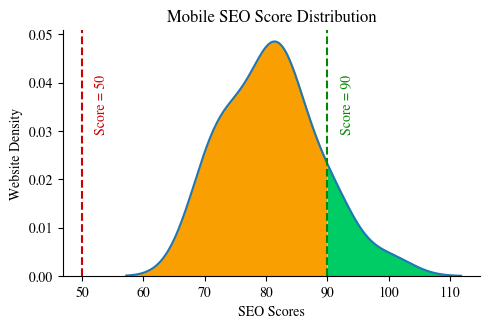

In [29]:
graph = sns.displot(scores, kind="kde", height=3, aspect=5/3)
graph.refline(x=90, color="#080")
graph.refline(x=50, color="#c00")

graph.set(xlabel="SEO Scores",
          ylabel="Website Density",
          title="Mobile SEO Score Distribution")

axes = graph.axes.flatten()
axes[0].text(92, 0.03, "Score = 90", c="#080", rotation=90)
axes[0].text(52, 0.03, "Score = 50", c="#c00", rotation=90)

kde_x = axes[0].lines[0].get_xdata()
kde_y = axes[0].lines[0].get_ydata()

axes[0].fill_between(kde_x, kde_y, where=(kde_x < 50), color="#f33")
axes[0].fill_between(kde_x, kde_y, where=(kde_x >= 50)
                     & (kde_x <= 90), color="#fa9f02")
axes[0].fill_between(kde_x, kde_y, where=(kde_x > 90), color="#0c6")

plt.savefig(f"results/{STRATEGY}_{CATEGORY}.pdf", bbox_inches="tight")
plt.show()


In [22]:
np.mean(scores)


80.85185185185185

In [23]:
print(np.max(scores), np.min(scores))


100.0 69.0


In [24]:
len(scores[np.where(scores >= 90)]) / len(scores) * 100


14.814814814814813

In [25]:
len(scores[np.where(scores <= 50)]) / len(scores) * 100

0.0

In [26]:
len(scores)


27

In [27]:
for k, v in json_obj.items():
    try:
        acc_score = v["lighthouseResult"]["categories"]["accessibility"]["score"] * 100
        if acc_score < 51:
            print(k)
    except:
        pass
